# Monty Hall problem


**Discover the Monty Hall problem, we visualization of results in a curve.<br>
And search params of the curve, with machine learning,<br>
we used linear regression.**

In [1]:
# Import the necessary packages

from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Two constants or two strategies used by the player (the player
# can choose one of them) in this game.

CHANGED = "Change"
KEEP = "Keep"

In [4]:
# This function simulates a series (a number of times) of the 
# game of Monty Hall with a given strategy.

def play(strategy, n_times):
    """ Simulates a series of the Monty Hall game.

    """
    # The good door
    good_door = np.random.randint(0, 3, n_times)

    # The first choice of player
    first_choice = np.random.randint(0, 3, n_times)

    if strategy == CHANGED:
        # The presenter eliminates the wrong door
        return first_choice != good_door

    # second choice is equal to the first choice
    return first_choice == good_door

## Generate the data for our problem:
**We do our simulation and we save the results in a list.**

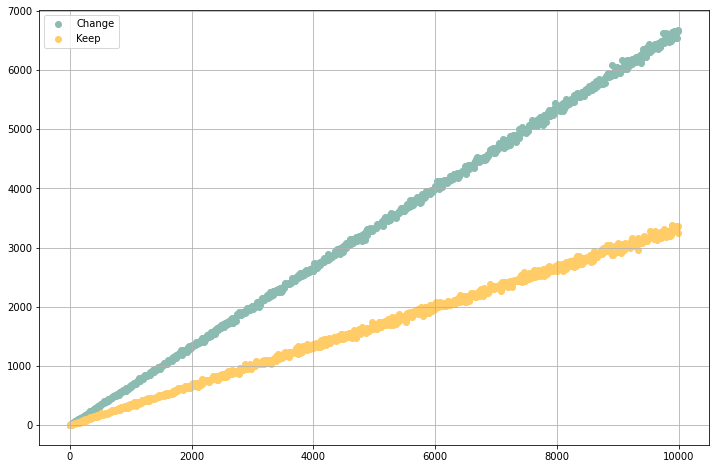

In [9]:
# A list of numbers of turns will be played in this game
list_n_times = list(range(1, 10_000, 10))

# In these lists, we will save the results of the simulation.
results_changed, results_keep = [], []

for n_times in list_n_times:
    # The results of the strategy in which by changing the door
    results_changed.append(np.sum(play(CHANGED, n_times)))

    # The results of the strategy in which by keep the first choice
    results_keep.append(np.sum(play(KEEP, n_times)))

# transform data from lists to arrays
simple = np.array(list_n_times, dtype=np.float64)
results_changed = np.array(results_changed, dtype=np.float64)
results_keep = np.array(results_keep, dtype=np.float64)

# Visualization of results
plt.figure(figsize=(12, 8))
plt.scatter(simple, results_changed, label=CHANGED, c="#8CBBB1")
plt.scatter(simple, results_keep, label=KEEP, c="#FFCC67")
plt.legend()
plt.grid()

## Search params of these curves, with curve_fit() function :

In [11]:
# This function returns the linear model

def model(x, a, b):
    """ linear model
    """
    return a * x + b

In [12]:
# final parameters of our models
params_changed, _ = optimize.curve_fit(model, simple, results_changed)
params_keep, _ = optimize.curve_fit(model, simple, results_keep)

In [13]:
# show results
print(params_changed)
print(params_keep)

[ 0.66690114 -0.68211793]
[0.33254542 2.72209194]


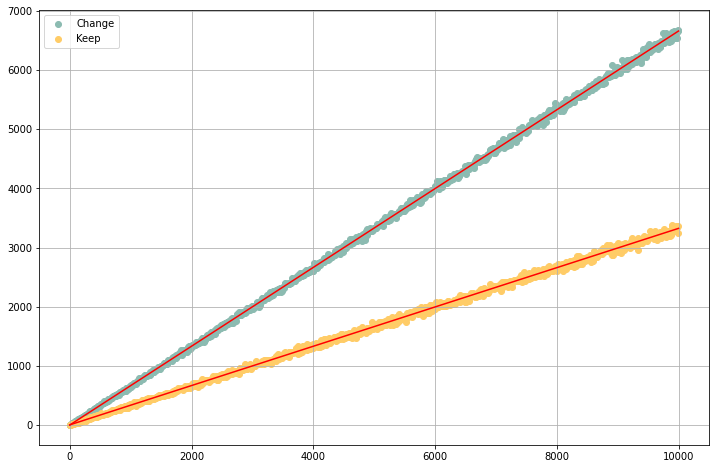

In [17]:
# plot resulta
plt.figure(figsize=(12, 8))
plt.scatter(simple, results_changed, label=CHANGED, c="#8CBBB1")
plt.scatter(simple, results_keep, label=KEEP, c="#FFCC67")
plt.legend()

plt.plot(simple, model(simple, *params_changed), c="r")
plt.plot(simple, model(simple, *params_keep), c="r")
plt.grid()

## Interpretation of results :

- <span style="color: #8CBBB1;"> In the changed strategy : </span>
    we have $y = \frac{2}{3} x $

- <span style="color: #FFCC67;"> In the keep strategy : </span>
    we have $y = \frac{1}{3} x $
    
**So there are $\frac{1}{3}$ chances of winning without changing, $\frac{2}{3}$ chances of winning by changing.**